In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
"""
use (0, 1), (1,e), (2,e**2), and (3, e**3) to form a natural spline and approximate the definite integral in the interval (0,3)
S(x) approximates f(x) = e**x
"""

'\nuse (0, 1), (1,e), (2,e**2), and (3, e**3) to form a natural spline and approximate the definite integral in the interval (0,3)\nS(x) approximates f(x) = e**x\n'

In [3]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


In [4]:
def spline_interpolate(a, b):

    # this is the data that we reference to interpolate
    x_points = [0, 1, 2, 3]
    y_points = [1, math.e, math.e**2, math.e**3]

    cs = CubicSpline(x_points, y_points, bc_type ='natural')
    integral = cs.integrate(a, b)
    print("Integral from", a, "to", b, "is:", integral)


    x_new = np.arange(a, b, 0.1).tolist()
    
    plt.figure()
    plt.plot(x_points, y_points, 'o', label='data points')
    x_new = np.arange(a,b)
    plt.plot(x_new, y_new, label='cubic spline')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Cubic Natural Spline Interpolation and Integration')
    plt.show()
    # this is the function that we will use to interpolate
    return cs.integrate


Integral from 0 to 3 is: 19.55228648940373


NameError: name 'y_new' is not defined

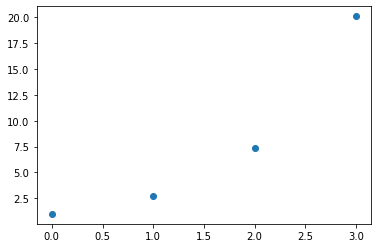

In [5]:

spline_interpolate(0,3)

In [6]:
def print_ppoly_equations(ppoly_instance):
    """
    Prints the piecewise polynomial equations for a given PPoly instance.
    """
    coefficients = ppoly_instance.c
    breakpoints = ppoly_instance.x

    for i in range(coefficients.shape[1]):
        segment_coef = coefficients[:, i]
        # Ignore leading coefficients that are zero
        segment_coef = segment_coef[np.nonzero(segment_coef)[0][0]:]
        equation = format_polynomial(segment_coef)
        print(f'For x in [{breakpoints[i]}, {breakpoints[i + 1]}]:')
        print(f'    {equation}')
def format_polynomial(coefs, var='x'):
    """
    Formats a single polynomial piece given its coefficients.
    """
    n = len(coefs)
    terms = []
    for i, coef in enumerate(coefs):
        power = n - i - 1
        if coef != 0:
            if power == 0:
                terms.append(f'{coef:.3f}')
            elif power == 1:
                terms.append(f'{coef:.3f}*{var}')
            else:
                terms.append(f'{coef:.3f}*{var}^{power}')
    return ' + '.join(terms) if terms else '0'


In [7]:
x_points = [0, 1, 2, 3]
y_points = [1, math.e, math.e**2, math.e**3]

cs = CubicSpline(x_points, y_points, bc_type ='natural')

print_ppoly_equations(cs)

For x in [0.0, 1.0]:
    0.252*x^3 + -0.000*x^2 + 1.466*x + 1.000
For x in [1.0, 2.0]:
    1.691*x^3 + 0.757*x^2 + 2.223*x + 2.718
For x in [2.0, 3.0]:
    -1.943*x^3 + 5.830*x^2 + 8.810*x + 7.389
